In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from scipy.stats import norm

## 1.	The time required for servicing transmissions is normally distributed with μ = 45 minutes and σ = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment? 

In [2]:
mean=45
std=8
# Since the manager plans to have work begin after 10mins
mean=mean+10

In [3]:
(mean,std)

(55, 8)

In [4]:
x=60

In [5]:
p_lesser=norm.cdf(x,mean,std)

In [6]:
p_value=1-p_lesser
np.round(p_value,5)

0.26599

## The probability that the service manager cannot meet his commitment = 26.599 %

## 2.	The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean μ = 38 and Standard deviation σ =6. For each statement below, please specify True/False. If false, briefly explain why.

    A. More employees at the processing center are older than 44 than between 38 and 44.

In [7]:
mean=38
std=6
n=400
# older than 44
p_44=1-norm.cdf(44,mean,std)
p_44

0.15865525393145707

In [8]:
# P (age > 38) 
p_38 = 1-norm.cdf(38,mean,std)
p_38

0.5

In [9]:
# P (age between 38 and 44)
p_final=1-p_44-p_38
p_final

0.3413447460685429

In [10]:
if(p_44>p_final):
    print('The Statement is True')
else:
    print('The Statement is False')

The Statement is False


## More employees at the processing center are older than 44 than between 38 and 44 is False

    B.A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.

In [11]:
p_30=norm.cdf(30,mean,std)
p_30

0.09121121972586788

In [12]:
# No of Employees whose age is less than 30 = P(x) * n
p_30*n

36.484487890347154

## A training program for employees under the age of 30 at the center would be expected to attract about 36 employees is True

## 3.	If X1 ~ N(μ, σ2) and X2 ~ N(μ, σ2) are iid normal random variables, then what is the difference between 2 X1 and X1 + X2? Discuss both their distributions and parameters.       

- X ∼ N(µ1, σ1^2), and  Y ∼ N(µ2, σ2^2) are two independent random variables then 
- X + Y ∼ N(µ1 + µ2, σ1^2 + σ2^2 )
- X − Y ∼ N(µ1 − µ2, σ1^2 + σ2^2 )
- Z = aX + bY , then Z ∼ N(aµ1 + bµ2, a^2σ1^2 + b^2σ2^2 )

- Z = aX + bY = 2x1 , a=2 and b=0 substituting in above equation
- Z ∼ N(2*µ1 + 0*µ1, 2^2 σ1^2 + 0^2 σ2^2)
- 2x1 ~ N(2*µ, 4 σ^2)

- X1 + X2 ∼ N(µ + µ, σ^2 + σ^2 )
- X1 + X2 ∼ N(2µ, 2 σ^2 )

# difference between 2 X1 and X1 + X2
- 2x1 ~ N(2µ, 4 σ^2)
- X1 + X2 ∼ N(2µ, 2 σ^2 )
- 2x1-(x1+x2) ~ N(0,6 σ^2)

## 4.	Let X ~ N(100, 20^2). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99. 

- X ~ N(100, 20^2)
- P(a,b)=0.99
- X = Z*S.D+µ

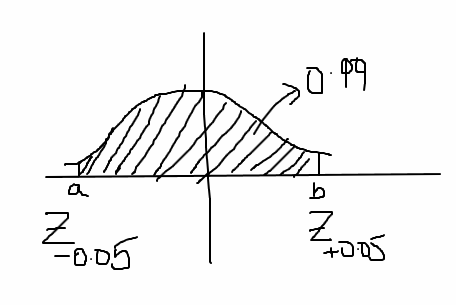

In [13]:
area=0.005
a=(norm.ppf(area)*20)+100 
# if the area under the curve is known we use Percent point function (inverse of `cdf`) to find the Z-Value

In [14]:
b=(-1*norm.ppf(area)*20)+100

In [15]:
norm.cdf(b,100,20)-norm.cdf(a,100,20) # Validation

0.99

In [16]:
# a and b
(a,b)

(48.483413929021985, 151.516586070978)

## 5.	Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 32) and Profit2 ~ N(7, 42) respectively. 
- Both the profits are in Million(dollars). Answer the following questions about the total profit of the company in Rupees. Assume that 1 dollar = Rs. 45

## A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.

- X + Y ∼ N(µ1 + µ2, σ1^2 + σ2^2 )
- Total Profit = Profit1 ~ N(5, 3^2) + Profit2 ~ N(7, 4^2)
- X + Y ∼ N(µ1 + µ2, σ1^2 + σ2^2 )
- Total Profit ~ N(12,5^2)

In [17]:
area=(1-0.95)/2
mean=12
std=5
a=(norm.ppf(area)*std)+mean 
b=(-1*norm.ppf(area)*std)+mean
(a,b)

(2.2001800772997306, 21.79981992270027)

In [18]:
norm.cdf(b,mean,std)-norm.cdf(a,mean,std) # Validation

0.95

In [19]:
(a*45,b*45)

(99.00810347848788, 980.9918965215121)

## Rupee_range 99.01 to 980.99 Millions

## B.	Specify the 5th percentile of profit (in Rupees) for the company

In [20]:
area=.05
area

0.05

In [21]:
a=(norm.ppf(area)*std)+mean

In [22]:
a*45

169.90793393591858

## 5th percentile of profit (in Rupees) for the company = 169.90 Million Rupees

## C.	Which of the two divisions has a larger probability of making a loss in a given year?

In [28]:
mean1=5
mean2=7
std1=3
std2=4
unit1_loss=norm.cdf(0,loc=mean1,scale=std1)
unit2_loss=norm.cdf(0,mean2,std2)
if(unit1_loss<unit2_loss):
    print('Division 2 has larger probability of making a loss in a given year',unit2_loss)
else:
    print('Division 1 has larger probability of making a loss in a given year i.e',unit1_loss)

Division 1 has larger probability of making a loss in a given year i.e 0.0477903522728147


In [29]:
unit1_loss*100

4.7790352272814705

In [27]:
unit2_loss*100

4.005915686381709